<a href="https://colab.research.google.com/github/vivandsouza/Images/blob/master/VivanDsouza_Batch4_assignment1A_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, pooling
from keras.utils import np_utils

from keras.datasets import mnist

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


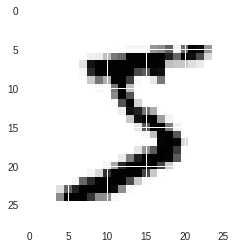

In [0]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [0]:
Y_train[:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [0]:
from keras.layers import Activation
model = Sequential()

model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1)))     
model.add(Convolution2D(32, (3, 3), activation='relu'))                            
model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(pooling.MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3,3), activation='relu'))
model.add(Convolution2D(10, 2))
model.add(Flatten())
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 2, 2, 32)          9248      
__________

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, epochs=15, verbose=1)

Epoch 1/15
60000/60000 [==============================] - 141s 2ms/step - loss: 0.1694 - acc: 0.9464
Epoch 2/15
60000/60000 [==============================] - 141s 2ms/step - loss: 0.0544 - acc: 0.9836
Epoch 3/15
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0395 - acc: 0.9880
Epoch 4/15
60000/60000 [==============================] - 143s 2ms/step - loss: 0.0302 - acc: 0.9902
Epoch 5/15
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0243 - acc: 0.9920
Epoch 6/15
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0212 - acc: 0.9931
Epoch 7/15
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0189 - acc: 0.9939
Epoch 8/15
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0157 - acc: 0.9948
Epoch 9/15
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0146 - acc: 0.9952
Epoch 10/15
60000/60000 [==============================] - 146s 2ms/step - loss: 0.0126 - a

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [0]:
print(score)

[0.035733915149908396, 0.992]


In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[6.98901180e-24 5.00868862e-18 4.90861607e-15 4.54467670e-18
  4.75314854e-23 3.02591489e-20 4.66107473e-37 1.00000000e+00
  3.64795410e-23 3.01225575e-20]
 [4.02928147e-17 4.76858001e-14 1.00000000e+00 8.14724678e-21
  1.46256368e-17 9.09273204e-27 2.53404602e-15 1.72079296e-16
  2.70500654e-18 3.08594261e-24]
 [3.63436885e-12 1.00000000e+00 7.52113107e-13 8.30105587e-15
  2.68415867e-12 6.37880249e-10 7.23510918e-10 8.25587421e-09
  6.97243695e-12 8.47944778e-16]
 [9.99998093e-01 6.95071709e-11 5.96523009e-08 1.92542977e-08
  5.39651310e-11 6.52492949e-10 1.86289230e-06 6.54789981e-12
  3.51520200e-08 3.13044612e-09]
 [6.02577915e-16 4.92661142e-13 1.99365112e-16 1.78853819e-14
  1.00000000e+00 1.80551541e-17 5.69785342e-15 2.30483445e-11
  5.98760581e-12 3.37395178e-09]
 [1.38875536e-10 9.99999881e-01 7.63170614e-13 5.49984252e-15
  3.82712556e-10 1.79651270e-12 8.13945439e-12 1.01272235e-07
  7.34224959e-10 4.08801174e-14]
 [2.28673372e-25 6.47637114e-15 2.64239816e-16 3.49146474e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_1'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored